In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import plotly.express as px
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

### <font color='red'>AI001 - Find Suitable Dataset</font>

In [ ]:
%%capture

from datasets import load_dataset
help(load_dataset)

mode = 'force_redownload'

train_data = load_dataset('md_gender_bias', name = 'funpedia', split = 'train', download_mode = mode)
test_data = load_dataset('md_gender_bias', name = 'funpedia', split = 'test', download_mode = mode)
val_data = load_dataset('md_gender_bias', name = 'funpedia', split = 'validation', download_mode = mode)

In [ ]:
print(train_data)
print(test_data)
print(val_data)

Dataset({
    features: ['text', 'gender', 'title', 'persona'],
    num_rows: 23897
})
Dataset({
    features: ['text', 'gender', 'title', 'persona'],
    num_rows: 2938
})
Dataset({
    features: ['text', 'gender', 'title', 'persona'],
    num_rows: 2984
})


In [ ]:
train_data = pd.DataFrame(train_data)
test_data = pd.DataFrame(test_data)
val_data = pd.DataFrame(val_data)

In [ ]:
total_nrows = len(train_data) + len(test_data) + len(val_data)
print('percentage data that is TRAIN:', round((len(train_data)/total_nrows)*100, 2))
print('percentage data that is TEST:', round((len(test_data)/total_nrows)*100, 2))
print('percentage data that is VALIDATION:', round((len(val_data)/total_nrows)*100, 2))

percentage data that is TRAIN: 80.14
percentage data that is TEST: 9.85
percentage data that is VALIDATION: 10.01


#### Load data locally (if need be)

In [ ]:
#data source: https://huggingface.co/datasets/md_gender_bias
#train_data = pd.read_json('md_gender_bias/funpedia/train.jsonl', lines = True)
#test_data = pd.read_json('md_gender_bias/funpedia/test.jsonl', lines = True)
#val_data = pd.read_json('md_gender_bias/funpedia/valid.jsonl', lines = True)

### <font color='red'>AI002 - EDA (Exploratory Data Analysis)</font>

In [ ]:
train_data.head(3)

,text,gender,title,persona
0,Max Landis is a comic book writer who wrote Ch...,male,Max Landis,Humorous
1,Félix stevens is a retired cuban sprinter who ...,male,Félix Stevens,Confident
2,Arthur Engelbert is a professor at the Univers...,male,Arthur Engelbert,Creative


In [ ]:
test_data.head(3)

,text,gender,title,persona
0,Hmmm yes Horacio Calcaterra is a sportsman tha...,male,Horacio Calcaterra,"Articulate (Well-spoken, Expressive)"
1,John A. Fallon kindly accepted his appointment...,male,John A. Fallon,Humble
2,Arthur Knight sadly passed as a result of part...,male,Arthur Gerald Knight,Peaceful


In [ ]:
val_data.head(3)

,text,gender,title,persona
0,I wonder what went through Bill Tom Closs's mi...,male,Bill Closs,Deep
1,Gerald Rashard Everett is a football tight end...,male,Gerald Everett,Playful
2,The Nahoni Range is a mountan range that is lo...,male,Nahoni Range,Creative


In [ ]:
train_data.tail(15)

,text,gender,title,persona
23882,Jesse Gress is an amazing rock guitarist!,male,Jesse Gress,Energetic
23883,I wonder how Elam Stevenson's life would have ...,male,Elam Stevenson,Reflective
23884,"If you seek the Olga Kostenko, you must go to ...",female,Olga Kostenko,Insightful
23885,Even though Charles A. Hickey had a great care...,male,Charles A. Hickey,Empathetic
23886,P. Frank Winkler a well known astro careerist ...,male,Frank Winkler,Insightful
23887,"This concert pianist, Edward Cahill's music wa...",male,Edward Cahill (pianist),Warm
23888,Your heart will be touched by the personal sto...,gender-neutral,Michèle Stephenson,"Compassionate (Sympathetic, Warm)"
23889,"John Boning played in 35 matches, totalling 65...",male,John Boning,Practical
23890,Katie spencer has worked many films with sarah...,female,Katie Spencer,Scholarly
23891,English Crickiter Ian Burnley was born 03/11/1...,male,Ian Burnley,Exciting


In [ ]:
train_data['gender'].value_counts()

male              19156
female             3594
gender-neutral     1147
Name: gender, dtype: int64

In [ ]:
train_data.sample(5)

,text,gender,title,persona
12413,"Located in the lovely state of Idaho, Smoky Mo...",male,Smoky Mountain (Idaho),Warm
9074,Glad that Derek Wallace was inserted into the ...,male,Derek Wallace,Rational
15829,There is no doubt in my mind that Shi Zhi will...,male,Shi Zhi,Optimistic
2602,"Born on November 23, 1805, Joseph Pancoast was...",male,Joseph Pancoast,"Objective (Detached, Impartial)"
20893,Matt Conlan is an Australian politician.,male,Matt Conlan,Charming


In [ ]:
train_data.head()

,text,gender,title,persona
0,Max Landis is a comic book writer who wrote Ch...,male,Max Landis,Humorous
1,Félix stevens is a retired cuban sprinter who ...,male,Félix Stevens,Confident
2,Arthur Engelbert is a professor at the Univers...,male,Arthur Engelbert,Creative
3,Danielle Frenkel is a high jumper born in Israel,female,Danielle Frenkel,Brilliant
4,Ernie O'Malley served in the Irish republican ...,male,Ernie O'Malley,Gentle


In [ ]:
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     2938 non-null   object
 1   gender   2938 non-null   object
 2   title    2938 non-null   object
 3   persona  2938 non-null   object
dtypes: object(4)
memory usage: 91.9+ KB


In [ ]:
#combine pre-split datasets into one then apply train test split function twice
unified_data = train_data.append(test_data, ignore_index=True)
unified_data = unified_data.append(val_data, ignore_index=True)
print('nrows raw unified dataset:', len(unified_data))

nrows raw unified dataset: 29819


/var/folders/70/yx3rlp812k545ncgsfplvcbc0000gn/T/ipykernel_65819/2186302442.py:2: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/70/yx3rlp812k545ncgsfplvcbc0000gn/T/ipykernel_65819/2186302442.py:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
unified_data.head(1)

,text,gender,title,persona
0,Max Landis is a comic book writer who wrote Ch...,male,Max Landis,Humorous


In [ ]:
#drop all columns except text and label
unified_data = unified_data[['text', 'gender']]

In [ ]:
unified_data.head(1)

,text,gender
0,Max Landis is a comic book writer who wrote Ch...,male


In [ ]:
#ensure all text lowercase so can compare for duplicates
for col in ['text', 'gender']:
    unified_data[col] = unified_data[col].str.lower()

In [ ]:
unified_data.head(3)

,text,gender
0,max landis is a comic book writer who wrote ch...,male
1,félix stevens is a retired cuban sprinter who ...,male
2,arthur engelbert is a professor at the univers...,male


In [ ]:
#check duplicate rows in 'text' column
print('Number of duplicates:', len(unified_data[unified_data.duplicated(['text'])]))
#drop duplicates
unified_data.drop_duplicates(subset=['text'], inplace = True)
#recheck number of duplicates
print('Number of duplicates:', len(unified_data[unified_data.duplicated(['text'])]))

Number of duplicates: 1
Number of duplicates: 0


In [ ]:
unified_data.head()

,text,gender
0,max landis is a comic book writer who wrote ch...,male
1,félix stevens is a retired cuban sprinter who ...,male
2,arthur engelbert is a professor at the univers...,male
3,danielle frenkel is a high jumper born in israel,female
4,ernie o'malley served in the irish republican ...,male


<AxesSubplot:title={'center':'UNIFIED data class counts'}>

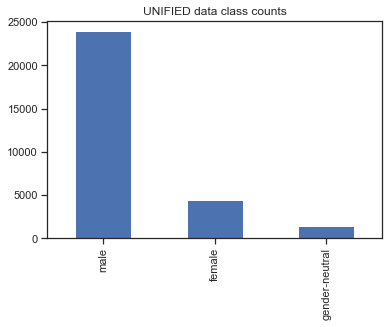

In [ ]:
unified_data['gender'].value_counts().plot(kind = 'bar', title = 'UNIFIED data class counts')

In [ ]:
class_counts_df = pd.DataFrame(unified_data['gender'].value_counts())
class_counts_df.reset_index(inplace = True)
class_counts_df.columns = ['class', 'counts']
print(class_counts_df.head())

fig = px.bar(class_counts_df, x = 'class', y = 'counts', title = 'UNIFIED data class counts')
fig.show()

            class  counts
0            male   23938
1          female    4457
2  gender-neutral    1423


to do:
- drop 'gender-neutral'
- fix considerable class imbalance between 'male' and 'female' by downsampling 'male' class
- check NAs

In [ ]:
#check NAs
class_counts_df.isna().sum()

class     0
counts    0
dtype: int64

In [ ]:
#check NAs
unified_data.isnull().sum()

text      0
gender    0
dtype: int64

In [ ]:
#drop NAs
unified_data.dropna(inplace = True)

In [ ]:
#drop 'gender-neutral' class?
unified_data = unified_data[unified_data['gender'] != 'gender-neutral']

In [ ]:
unified_data['gender'].value_counts()

male      23938
female     4457
Name: gender, dtype: int64

<AxesSubplot:title={'center':'UNIFIED data class counts'}>

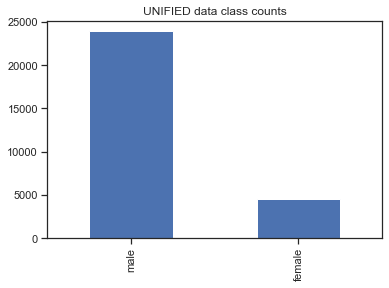

In [ ]:
unified_data['gender'].value_counts().plot(kind = 'bar', title = 'UNIFIED data class counts')

In [ ]:
#check class imbalance
print('\'male\' class is ', round(len(unified_data[unified_data['gender'] == 'male'])/len(unified_data[unified_data['gender'] == 'female']), 2), 'times larger than \'female\' class')

'male' class is  5.37 times larger than 'female' class


In [ ]:
unified_data['text'].shape

(28395,)

In [ ]:
unified_data[unified_data['gender'] == 'female'].head(10)

,text,gender
3,danielle frenkel is a high jumper born in israel,female
12,tania mihailuk is a politician who was born in...,female
13,juliet taylor is a woman who works as a castin...,female
14,margaret caroline rudd was born in britain. sh...,female
15,retta scott was an american artist who died in...,female
16,cicely mary barker was a fantasy illustrator w...,female
20,che zahara worked as a malay activist and foug...,female
21,"i feel gratitude towards evelyn dunbar, she he...",female
24,"geraldine kattnig was born on february 4, 1930...",female
28,amy thomson is a hard science fiction writing ...,female


In [ ]:
#downsample 'male' to fix class imbalance
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority', random_state= 0)
X = np.array(unified_data['text']).reshape(-1, 1)
y = np.array(unified_data['gender']).reshape(-1, 1)
X_undersample, y_undersample = undersample.fit_resample(X, y)

In [ ]:
#flatten to 1D array in order to reocmbine into a new undersampled 'unified_data' dataframe
X_undersample = X_undersample.flatten()
y_undersample = y_undersample.flatten()

In [ ]:
print(X_undersample.shape)
print(y_undersample.shape)

(8914,)
(8914,)


In [ ]:
unified_data = pd.DataFrame({'text': X_undersample, 'gender': list(y_undersample)}, columns=['text', 'gender'])

In [ ]:
unified_data.head(10)

,text,gender
0,danielle frenkel is a high jumper born in israel,female
1,tania mihailuk is a politician who was born in...,female
2,juliet taylor is a woman who works as a castin...,female
3,margaret caroline rudd was born in britain. sh...,female
4,retta scott was an american artist who died in...,female
5,cicely mary barker was a fantasy illustrator w...,female
6,che zahara worked as a malay activist and foug...,female
7,"i feel gratitude towards evelyn dunbar, she he...",female
8,"geraldine kattnig was born on february 4, 1930...",female
9,amy thomson is a hard science fiction writing ...,female


In [ ]:
#check class imbalance
print('\'male\' class is ', round(len(unified_data[unified_data['gender'] == 'male'])/len(unified_data[unified_data['gender'] == 'female']), 2), 'times larger than \'female\' class')

'male' class is  1.0 times larger than 'female' class


<AxesSubplot:title={'center':'UNIFIED data class counts'}>

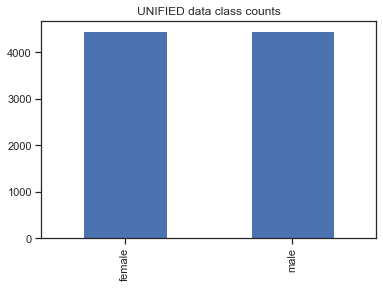

In [ ]:
#check successful downsampling (undersampling)
unified_data['gender'].value_counts().plot(kind = 'bar', title = 'UNIFIED data class counts')

In [ ]:
unified_data['text'][0]

'danielle frenkel is a high jumper born in israel'

In [ ]:
unified_data['len_text'] = 0

unified_data.head()

,text,gender,len_text
0,danielle frenkel is a high jumper born in israel,female,0
1,tania mihailuk is a politician who was born in...,female,0
2,juliet taylor is a woman who works as a castin...,female,0
3,margaret caroline rudd was born in britain. sh...,female,0
4,retta scott was an american artist who died in...,female,0


In [ ]:
len(unified_data)

8914

In [ ]:
#inefficient loop takes too long
#for row in range(0, len(unified_data)):
    #unified_data['len_text'][row] = len(unified_data['text'][row])
    
unified_data['len_text'] = unified_data['text'].str.len()

In [ ]:
unified_data['len_text'].head()

0    48
1    56
2    56
3    78
4    51
Name: len_text, dtype: int64

In [ ]:
unified_data.head(3)

,text,gender,len_text
0,danielle frenkel is a high jumper born in israel,female,48
1,tania mihailuk is a politician who was born in...,female,56
2,juliet taylor is a woman who works as a castin...,female,56


In [ ]:
unified_data.tail(3)

,text,gender,len_text
8911,john born in the great city of quebec and beca...,male,70
8912,"spending the longest time in prison, li wangya...",male,98
8913,thank you so much for letting me meet the trac...,male,66


In [ ]:
unified_data.head(200)

,text,gender,len_text
0,danielle frenkel is a high jumper born in israel,female,48
1,tania mihailuk is a politician who was born in...,female,56
2,juliet taylor is a woman who works as a castin...,female,56
3,margaret caroline rudd was born in britain. sh...,female,78
4,retta scott was an american artist who died in...,female,51
...,...,...,...
195,steliana nistor was a key member of the romani...,female,108
196,it's so interesting to read about tziporah hel...,female,113
197,"i am very involved in the cycling world, and l...",female,92
198,gina wilson was born in australia.,female,34


In [ ]:
unified_data['len_text'].value_counts()

81     139
86     135
84     133
78     132
91     131
      ... 
162      1
17       1
13       1
174      1
177      1
Name: len_text, Length: 161, dtype: int64

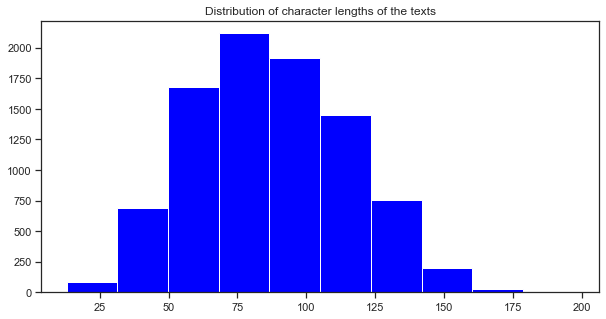

In [ ]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.hist(unified_data['len_text'], color ='blue')
#plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.title("Distribution of character lengths of the texts")
plt.show()

### <font color='red'>AI003 - Preprocess the Text and Create Text Embeddings</font>

In [ ]:
#test 'train_test_split'
X = unified_data['text']
y = unified_data['gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2, stratify = y)   #'stratify' argument ensures same class proportions for each split

https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f

In [ ]:
#convert two classes to new binary id column
unified_data['gender_id'] = unified_data['gender']
unified_data['gender_id'].replace(['male', 'female'], [0, 1], inplace = True)
print(unified_data[unified_data['gender'] == 'male'].head(3))
print(unified_data[unified_data['gender'] == 'female'].head(3))

                                                   text gender  len_text  \
4457  holy moly! josh brown guest starred in the sho...   male        99   
4458  jim colver has been serving the residents of a...   male        74   
4459  born in cleveland, ford was luckily taken by t...   male       104   

      gender_id  
4457          0  
4458          0  
4459          0  
                                                text  gender  len_text  \
0   danielle frenkel is a high jumper born in israel  female        48   
1  tania mihailuk is a politician who was born in...  female        56   
2  juliet taylor is a woman who works as a castin...  female        56   

   gender_id  
0          1  
1          1  
2          1  


In [ ]:
#import sklearn stop words
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

stop_words = list(ENGLISH_STOP_WORDS)
print(stop_words)
print(len(stop_words))
my_stop_words = stop_words.copy()

#to add stop words, e.g.
#my_stop_words = text.ENGLISH_STOP_WORDS.union(["book"])

word_remove = ['he', 'she', 'him', 'her', 'hers', 'his', 'himself', 'herself']
for i in my_stop_words:
    if i in word_remove:
        my_stop_words.remove(i)

print('-'*100)
print(my_stop_words)
print(len(my_stop_words))

my_stop_words = frozenset(my_stop_words)
type(my_stop_words)

['than', 'will', 'off', 'itself', 'one', 'namely', 'several', 'our', 'from', 'myself', 'whereafter', 'alone', 'everywhere', 'about', 'whereby', 'against', 'fifteen', 'being', 'already', 'himself', 'seemed', 'any', 'together', 'are', 'bill', 'yourself', 'afterwards', 'even', 'since', 'mostly', 'have', 'yours', 'hereafter', 'de', 'find', 'me', 'also', 'his', 'towards', 'thick', 'seem', 'someone', 'everything', 'or', 'co', 'perhaps', 'mine', 'always', 'he', 'ten', 'your', 'has', 'there', 'do', 'ourselves', 'whither', 'thereby', 'herself', 'next', 'describe', 'among', 'whatever', 'couldnt', 'rather', 'indeed', 'four', 'i', 'again', 'keep', 'still', 'we', 'yet', 'top', 'call', 'done', 'whom', 'an', 'latterly', 'each', 'as', 'ours', 'anywhere', 'twenty', 'not', 'out', 'before', 'own', 'put', 'five', 'must', 'other', 'eg', 'themselves', 'nobody', 'never', 'it', 'take', 'what', 'con', 'after', 'can', 'you', 'nothing', 'meanwhile', 'in', 'three', 'twelve', 'etc', 'eight', 'empty', 'toward', 'le

frozenset

In [ ]:
def stop_words_search(string):
        if string in stop_words:
            print('yes, present in stop words list')
        else:
            print('no, not present in stop words list')
            
stop_words_search('man')
stop_words_search('woman')
stop_words_search('girl')
stop_words_search('boy')

no, not present in stop words list
no, not present in stop words list
no, not present in stop words list
no, not present in stop words list


In [ ]:
unified_data.head()

,text,gender,len_text,gender_id
0,danielle frenkel is a high jumper born in israel,female,48,1
1,tania mihailuk is a politician who was born in...,female,56,1
2,juliet taylor is a woman who works as a castin...,female,56,1
3,margaret caroline rudd was born in britain. sh...,female,78,1
4,retta scott was an american artist who died in...,female,51,1


In [ ]:
type(unified_data['text'])

pandas.core.series.Series

In [ ]:
import nltk
#https://www.nltk.org/data.html   instructions for manual download
#https://www.nltk.org/nltk_data/
#SLL cert error so need to download manually from above website then move into relevant subfolder of /usr/local/share/nltk_data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>
[nltk_data] Error loading omw-1.4: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>


False

In [ ]:
#https://courses.cs.duke.edu/spring14/compsci290/assignments/lab02.html
#https://www.kirenz.com/post/2021-12-11-text-mining-and-sentiment-analysis-with-nltk-and-pandas-in-python/text-mining-and-sentiment-analysis-with-nltk-and-pandas-in-python/

from nltk.tokenize import word_tokenize   #requires nltk.download('punkt') but SSL cert error
from nltk.tokenize import TreebankWordTokenizer   #equivalent to word_tokenize just doesn't require a download
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist

#remove punctuation from texts
#unified_data['text'] = unified_data['text'].str.replace(r'[^\w\s]+', '')

#regex here already removes punctuation
#regex here includes tokens that have at least one letter, removing numbers from consideration (can be used in token_pattern argument too)
regexp = RegexpTokenizer(u'(?ui)\\b\\w*[a-z]+\\w*\\b')

unified_data['text_token']=unified_data['text'].apply(regexp.tokenize)

#count = Counter(tokens)
#print(count.most_common(10))

print('BEFORE stopwords filter\n', unified_data['text_token'].head())
#remove stopwords
unified_data['text_token'] = unified_data['text_token'].apply(lambda x: [item for item in x if item not in my_stop_words])
print('AFTER stopwords filter\n', unified_data['text_token'].head())

#keep only words longer than 1 characters
unified_data['text_string'] = unified_data['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>1]))

#create list of all words
all_words = ' '.join([word for word in unified_data['text_string']])

#tokenize all_words
#tokenizer = TreebankWordTokenizer()
#tokenized_words = tokenizer.tokenize(all_words)
tokenized_words = word_tokenize(all_words)

#create a frequency distribution which records the number of times each word has occurred:
fdist = FreqDist(tokenized_words)
fdist

BEFORE stopwords filter
 0    [danielle, frenkel, is, a, high, jumper, born,...
1    [tania, mihailuk, is, a, politician, who, was,...
2    [juliet, taylor, is, a, woman, who, works, as,...
3    [margaret, caroline, rudd, was, born, in, brit...
4    [retta, scott, was, an, american, artist, who,...
Name: text_token, dtype: object
AFTER stopwords filter
 0      [danielle, frenkel, high, jumper, born, israel]
1       [tania, mihailuk, politician, born, australia]
2    [juliet, taylor, woman, works, casting, director]
3    [margaret, caroline, rudd, born, britain, she,...
4               [retta, scott, american, artist, died]
Name: text_token, dtype: object


FreqDist({'her': 950, 'she': 704, 'his': 606, 'he': 582, 'born': 555, 'american': 470, 'great': 388, 'like': 351, 'known': 299, 'amazing': 281, ...})

In [ ]:
#search specific words
fdist["americans"]

6

In [ ]:
fdist.most_common(10)

[('her', 950),
 ('she', 704),
 ('his', 606),
 ('he', 582),
 ('born', 555),
 ('american', 470),
 ('great', 388),
 ('like', 351),
 ('known', 299),
 ('amazing', 281)]

In [ ]:
fdist.tabulate(15)

     her      she      his       he     born american    great     like    known  amazing  actress     work   player     love     best 
     950      704      606      582      555      470      388      351      299      281      272      263      257      247      245 


<AxesSubplot:>

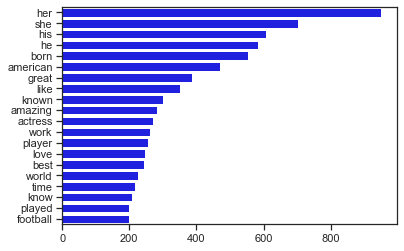

In [ ]:
# Obtain top 10 words
n = 20
top_n = fdist.most_common(n)

# Create pandas series to make plotting easier
fdist_pseries = pd.Series(dict(top_n))

import seaborn as sns
sns.set_theme(style="ticks")

sns.barplot(y=fdist_pseries.index, x=fdist_pseries.values, color='blue')

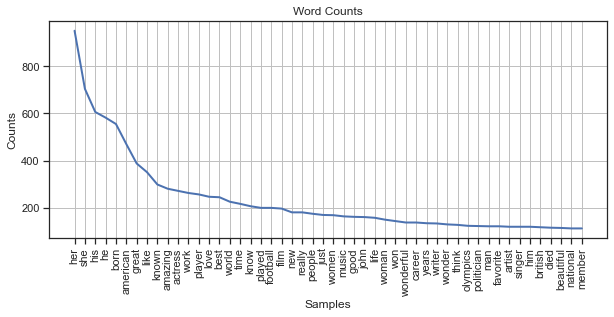

<AxesSubplot:title={'center':'Word Counts'}, xlabel='Samples', ylabel='Counts'>

In [ ]:
#plot top 50
from matplotlib.pyplot import figure
figure(figsize=(10, 4))
fdist.plot(50, title = 'Word Counts')

In [ ]:
import plotly.express as px

fig = px.bar(y=fdist_pseries.index, x=fdist_pseries.values)

# sort values
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})

# show plot
fig.show()

In [ ]:
#Now we can use our fdist dictionary to drop words which occur less than a certain amount of times (usually we use a value of 3 or 4)
#argument in Tfidfvectorizer that does the same
unified_data['text_string_fdist'] = unified_data['text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 3 ]))

Stemming just removes or stems the last few characters of a word, often leading to incorrect meanings and spelling. Lemmatization considers the context and converts the word to its meaningful base form

In [ ]:
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

unified_data['text_string_lem'] = unified_data['text_string_fdist'].apply(wordnet_lem.lemmatize)

#sometimes no words to lemmatize so can compare two columns to verify
#check if the columns are equal
unified_data['is_equal']=(unified_data['text_string_fdist']==unified_data['text_string_lem'])
print(unified_data.is_equal.value_counts())

True     8911
False       3
Name: is_equal, dtype: int64


In [ ]:
unified_data.head()

,text,gender,len_text,gender_id,text_token,text_string,text_string_fdist,text_string_lem,is_equal
0,danielle frenkel is a high jumper born in israel,female,48,1,"[danielle, frenkel, high, jumper, born, israel]",danielle frenkel high jumper born israel,danielle high born israel,danielle high born israel,True
1,tania mihailuk is a politician who was born in...,female,56,1,"[tania, mihailuk, politician, born, australia]",tania mihailuk politician born australia,politician born australia,politician born australia,True
2,juliet taylor is a woman who works as a castin...,female,56,1,"[juliet, taylor, woman, works, casting, director]",juliet taylor woman works casting director,juliet taylor woman works casting director,juliet taylor woman works casting director,True
3,margaret caroline rudd was born in britain. sh...,female,78,1,"[margaret, caroline, rudd, born, britain, she,...",margaret caroline rudd born britain she notori...,margaret caroline born britain she notorious f...,margaret caroline born britain she notorious f...,True
4,retta scott was an american artist who died in...,female,51,1,"[retta, scott, american, artist, died]",retta scott american artist died,scott american artist died,scott american artist died,True


In [ ]:
#prep for word cloud
all_words_lem = ' '.join([word for word in unified_data['text_string_lem']])
all_words_lem[0:1000]

'danielle high born israel politician born australia juliet taylor woman works casting director margaret caroline born britain she notorious female scott american artist died mary barker fantasy illustrator flowers worked malay activist fought hard women children rights singapore feel gratitude evelyn she helped women land army world war ii paved way peace born february austria actress amy thomson hard science fiction writing feminist pamela scored her best bowling figure women cricket world cup eileen somewhat popular actress tv personality having appeared love novel bloody jack amazing story girl london man love dr moira marvel comics know comes polish born charles work wall history successful african american history consider his greatest achievement great reality television series graced air starting june mary years old her skin used judge her love watching teen miss usa pageants colorful ellis amazing women she women proud julie katherine british legal scholar academic administrat

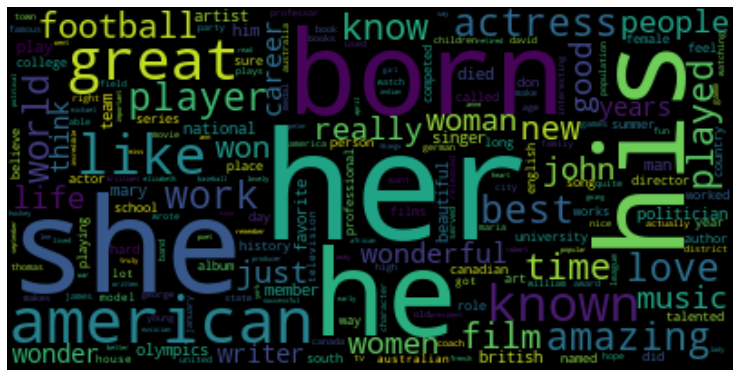

In [ ]:
%matplotlib inline

#word cloud using frequencies to infer word sizing
#convert FreqDict object to dictionary
fdist_dict = dict(fdist)

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=fdist_dict)
plt.figure(figsize=(13, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
unified_data = unified_data[['text_string_lem', 'gender_id', 'gender']]
unified_data.head(3)

,text_string_lem,gender_id,gender
0,danielle high born israel,1,female
1,politician born australia,1,female
2,juliet taylor woman works casting director,1,female


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer



#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
#cv = CountVectorizer()

#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
tfidf = TfidfVectorizer(max_features = 10000, 
                        max_df=0.5, 
                        encoding='utf-8', 
                        ngram_range=(1, 3), 
                        stop_words=None,   #already done above
                        lowercase = True,   #already done above
                        token_pattern = u'(?ui)\\b\\w*[a-z]+\\w*\\b',   #same as before
                        use_idf = True)

#X = cv.fit_transform(unified_data['text_string_lem']).toarray()
X = tfidf.fit_transform(unified_data['text_string_lem']).toarray()
y = unified_data['gender_id']

#stratify = y should only be used for imbalanced classes but this has already been corrected so no need but wil artificially improve especialy if one class more easy to classify than another
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2) 

print('percentage data that is TRAIN:', round((len(X_train)/len(unified_data))*100, 2))
print('percentage data that is TEST:', round((len(X_test)/len(unified_data))*100, 2))

percentage data that is TRAIN: 80.0
percentage data that is TEST: 20.0


In [ ]:
#text transformed via TfidVectorizer function to matrix of numbers that model will understand
X[0:4]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#feature_names = cv.get_feature_names_out()
feature_names = tfidf.get_feature_names_out()
print(feature_names)
print('-'*50)
print('Number of features extracted:', len(feature_names))

['11th' '13th' '15th' ... 'zoey' 'zone' 'zoo']
--------------------------------------------------
Number of features extracted: 10000


### <font color='red'>AI004 - Explore Two Appropriate Models and Train</font>

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1) 

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

#define model
#https://xgboost.readthedocs.io/en/stable/parameter.html
#control imbalanced classes with 'scale_pos_weights' (default = 1) but use quick formula sum(negative instances) / sum(positive instances)
model = XGBClassifier(n_estimators = 100, max_depth = 5, random_state = 0, verbosity = 1, learning_rate = 0.3, objective = 'binary:logistic', n_jobs = 4)

#grid search
#https://machinelearningmastery.com/tune-learning-rate-for-gradient-boosting-with-xgboost-in-python/
#https://machinelearningmastery.com/xgboost-for-imbalanced-classification/
#https://machinelearningmastery.com/tune-number-size-decision-trees-xgboost-python/

In [ ]:
from sklearn.metrics import get_scorer_names

get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_

In [ ]:
from sklearn.model_selection import cross_val_score
from statistics import mean
from sklearn.model_selection import GridSearchCV

#https://machinelearningmastery.com/how-to-configure-k-fold-cross-validation/

#Tour of Evaluation Metrics for Imbalanced Classification
#https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/

k = 2

def evaluate_model(cross_val):
    #GRID SEARCH CODE
    #-----
    learning_rate = [0.3]
    n_estimators = [100]
    param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
    grid_search = GridSearchCV(model, param_grid, scoring="accuracy", cv=cross_val, n_jobs=-1, verbose = 0)
    grid_result = grid_search.fit(X_train, y_train)
    
    #summarize performance
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    #-----
    
    #NON-GRID SEARCH CODE - (uncomment all below)
    #evaluate model
    #n_jobs=-1 means using all processors
    #scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cross_val, n_jobs=-1, verbose = 0)

    #summarize performance
    #print('Accuracy: %.3f' % mean(scores))

    #return mean(scores), min(scores), max(scores)
    
#means, mins, maxs = list(), list(), list()

https://towardsdatascience.com/pooled-roc-with-xgboost-and-plotly-553a8169680c#:~:text=To%20get%20a%20ROC%20curve,validation%20and%20got%20500%20results.

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

folds = range(1, k+1)

for fold_num in tqdm(folds):
	#define test condition
	#cross_val = RepeatedStratifiedKFold(n_splits=k, n_repeats=2, random_state=0)
	#cross_val = StratifiedKFold(n_splits=k, random_state=0, shuffle=True)
	cross_val = KFold(n_splits=k, random_state=0, shuffle=True)

	#GRID SEARCH CODE
	#-----
	evaluate_model(cross_val)
	print('> folds=%d' % (fold_num))
	#-----

	#NON-GRID SEARCH CODE - (uncomment all below)
	# evaluate k value
	#k_mean, k_min, k_max = evaluate_model(cross_val)

	# report performance
	#print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (fold_num, k_mean, k_min, k_max))

	# store mean accuracy
	#means.append(k_mean)

	# store min and max relative to the mean
	#mins.append(k_mean - k_min)
	#maxs.append(k_max - k_mean)


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
#fit model to training data
#https://xgboost.readthedocs.io/en/stable/parameter.html
model.fit(X_train, y_train)

#make predictions for test data
y_pred = model.predict(X_test)
y_pred = [round(value) for value in y_pred]

### <font color='red'>AI005 - Create Evaluation Visualizations</font>

Accuracy: 68.985%
              precision    recall  f1-score   support

      female       0.97      0.39      0.56       888
        male       0.62      0.99      0.76       895

    accuracy                           0.69      1783
   macro avg       0.80      0.69      0.66      1783
weighted avg       0.80      0.69      0.66      1783



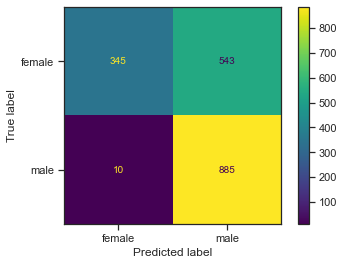

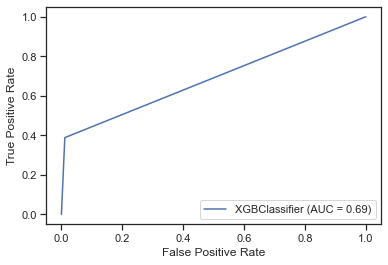

In [ ]:
# evaluate predictions
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve, auc, plot_roc_curve, RocCurveDisplay

y_test_alt = pd.Series(y_test)
y_test_alt.replace(0, 'male', inplace = True)
y_test_alt.replace(1, 'female', inplace = True)
y_pred_alt = pd.Series(y_pred)
y_pred_alt.replace(0, 'male', inplace = True)
y_pred_alt.replace(1, 'female', inplace = True)

accuracy = accuracy_score(y_test, y_pred)

print('Accuracy: %.3f%%' % (accuracy * 100.0))

print(classification_report(y_test_alt, y_pred_alt))
ConfusionMatrixDisplay.from_predictions(y_test_alt, y_pred_alt)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='XGBClassifier')
display.plot()
plt.show()

##### <font color='red'>DOESN'T WORK THE BEST BECAUSE MORE PREPROCESSING REQUIRED BEFORE tfidf.transform</font>

In [ ]:
#male = 0, female = 1

test1 = model.predict(tfidf.transform(["He was going to destroy the world"]))
test2 = model.predict(tfidf.transform(["What's happening man, what you saying?"]))
test3 = model.predict(tfidf.transform(["What's happening girl, what you saying?"]))
test4 = model.predict(tfidf.transform(["What did she say?"]))

#remember to add test to list
list_tests = [test1, test2, test3, test4]

for i in list_tests:
    if i == 0:
        print(i, 'male')
    elif i == 1:
        print(i, 'female')
    else:
        print('erroneous result')


[0] male
[0] male
[0] male
[1] female


In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB(n_jobs = 4)

In [ ]:
from sklearn.model_selection import cross_val_score
from statistics import mean

def evaluate_model(cross_val):
    #evaluate model
    #n_jobs=-1 means using all processors
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cross_val, n_jobs=-1, verbose = 0)

    #summarize performance
    print('Accuracy: %.3f' % mean(scores))

    return mean(scores), min(scores), max(scores)
    
means, mins, maxs = list(), list(), list()

https://towardsdatascience.com/pooled-roc-with-xgboost-and-plotly-553a8169680c#:~:text=To%20get%20a%20ROC%20curve,validation%20and%20got%20500%20results.

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

folds = range(1, k+1)

for fold_num in tqdm(folds):
	#define test condition
	cross_val = KFold(n_splits=k, random_state=0, shuffle=True)
 
	# evaluate k value
	k_mean, k_min, k_max = evaluate_model(cross_val)

	# report performance
	print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (fold_num, k_mean, k_min, k_max))

	# store mean accuracy
	means.append(k_mean)

	# store min and max relative to the mean
	mins.append(k_mean - k_min)
	maxs.append(k_max - k_mean)


  0%|          | 0/2 [00:00<?, ?it/s]

Best: 0.751789 using {'learning_rate': 0.3}
0.656571 (0.004299) with: {'learning_rate': 0.001}
0.673398 (0.000747) with: {'learning_rate': 0.01}
0.732436 (0.002487) with: {'learning_rate': 0.1}
0.746600 (0.003190) with: {'learning_rate': 0.2}
0.751789 (0.003892) with: {'learning_rate': 0.3}
Best: 0.751789 using {'learning_rate': 0.3}
0.656571 (0.004299) with: {'learning_rate': 0.001}
0.673398 (0.000747) with: {'learning_rate': 0.01}
0.732436 (0.002487) with: {'learning_rate': 0.1}
0.746600 (0.003190) with: {'learning_rate': 0.2}
0.751789 (0.003892) with: {'learning_rate': 0.3}


In [ ]:
#fit model to training data
model.fit(X_train, y_train)

#make predictions for test data
y_pred = model.predict(X_test)
y_pred = [round(value) for value in y_pred]

Accuracy: 68.985%
              precision    recall  f1-score   support

      female       0.97      0.39      0.56       888
        male       0.62      0.99      0.76       895

    accuracy                           0.69      1783
   macro avg       0.80      0.69      0.66      1783
weighted avg       0.80      0.69      0.66      1783



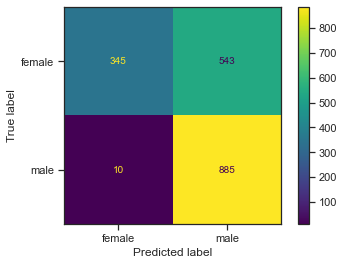

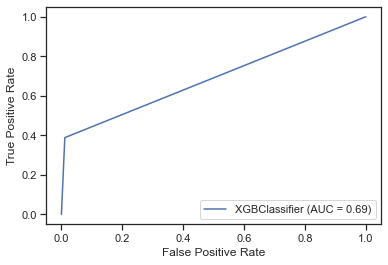

In [ ]:
# evaluate predictions
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve, auc, plot_roc_curve, RocCurveDisplay

y_test_alt = pd.Series(y_test)
y_test_alt.replace(0, 'male', inplace = True)
y_test_alt.replace(1, 'female', inplace = True)
y_pred_alt = pd.Series(y_pred)
y_pred_alt.replace(0, 'male', inplace = True)
y_pred_alt.replace(1, 'female', inplace = True)

accuracy = accuracy_score(y_test, y_pred)

print('Accuracy: %.3f%%' % (accuracy * 100.0))

print(classification_report(y_test_alt, y_pred_alt))
ConfusionMatrixDisplay.from_predictions(y_test_alt, y_pred_alt)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='XGBClassifier')
display.plot()
plt.show()

##### <font color='red'>DOESN'T WORK THE BEST BECAUSE MORE PREPROCESSING REQUIRED BEFORE tfidf.transform</font>

In [ ]:
#male = 0, female = 1

test1 = model.predict(tfidf.transform(["He was going to destroy the world"]))
test2 = model.predict(tfidf.transform(["What's happening man, what you saying?"]))
test3 = model.predict(tfidf.transform(["What's happening girl, what you saying?"]))
test4 = model.predict(tfidf.transform(["What did she say?"]))

#remember to add test to list
list_tests = [test1, test2, test3, test4]

for i in list_tests:
    if i == 0:
        print(i, 'male')
    elif i == 1:
        print(i, 'female')
    else:
        print('erroneous result')


[0] male
[0] male
[0] male
[1] female
